# Voronoi plot with Periodic Boundary Conditions (PDB) and color according to thier scale (with colorbar) 
### Adapt from : 
https://stackoverflow.com/questions/41244322/how-to-color-voronoi-according-to-a-color-scale-and-the-area-of-each-cell

https://stackoverflow.com/questions/26545897/drawing-a-colorbar-aside-a-line-plot-using-matplotlib


### Import library  

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

### Generate random points and thier weights

In [4]:
points = np.random.uniform(size=[64, 2])
weight = np.random.uniform(low=1.0, high=10.0, size=64)

In [6]:
points.shape

(64, 2)

In [7]:
points[0:5]

array([[ 0.78345425,  0.6451992 ],
       [ 0.04296835,  0.15911499],
       [ 0.10703402,  0.7977536 ],
       [ 0.50361495,  0.86247542],
       [ 0.86220871,  0.62545696]])

In [9]:
weight[0:5]

array([ 3.41777999,  4.08160271,  9.20928693,  5.13942863,  4.78343428])

### Setup color mapper 

In [10]:
vmax = max(weight)
vmin = min(weight)
norm = mpl.colors.Normalize(vmin = vmin, vmax= vmax, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.bwr)

In [11]:
Color = [mapper.to_rgba(x) for x in weight]

In [12]:
Color[0:3]

[(0.51764705882352935, 0.51764705882352935, 1.0, 1.0),
 (0.67450980392156867, 0.67450980392156867, 1.0, 1.0),
 (1.0, 0.1098039215686275, 0.1098039215686275, 1.0)]

### Voronoi without PBC

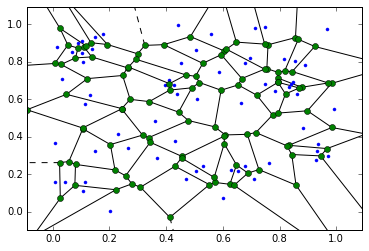

In [23]:
vor = Voronoi(points)
fig1 = voronoi_plot_2d(vor)

### Color voronoi with their scales

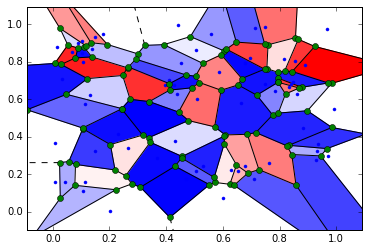

In [28]:
fig1 = voronoi_plot_2d(vor)
for r in range(len(points)): ## be Not inclused PCB images
        region = vor.regions[vor.point_region[r]]
        if not -1 in region:
                polygon = [vor.vertices[i] for i in region]
                plt.fill(*zip(*polygon), color=Color[r])

### Setup the PBC 

In [13]:
pbc = np.empty((0,2))
for sx in [-1,0,1] :
        for sy in [-1,0,1] :
                if (sx != 0 or sy != 0) :
                        pbc = np.vstack([pbc,points + [sx*max(points[:,0]), sy*max(points[:,0])]])

### pbc is shoult be 8 x len(points) since pbc is 8 images of points

In [16]:
8 *len(points) == len(pbc)

True

### Voronoi with PBC

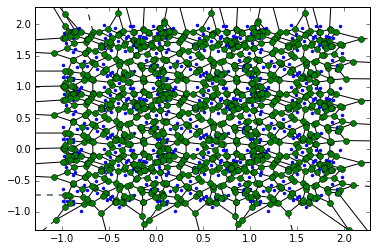

In [30]:
points_pbc = np.vstack([points,pbc]) ### original cell is on the top of an array
vor_pbc = Voronoi(points_pbc)
fig2 = voronoi_plot_2d(vor_pbc)

### Color the original cell with color scale

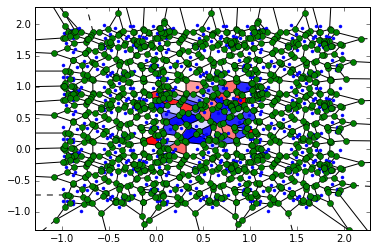

In [31]:
fig2 = voronoi_plot_2d(vor_pbc)
for r in range(len(points)): ## be NOT inclused PCB images
        region = vor_pbc.regions[vor_pbc.point_region[r]]
        if not -1 in region:
                polygon = [vor_pbc.vertices[i] for i in region]
                plt.fill(*zip(*polygon), color=Color[r])

### Limit x and y axis to show only the original cell and add color bar

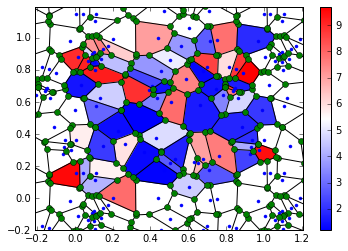

In [44]:
fig2 = voronoi_plot_2d(vor_pbc)
stdx = np.std(points[:,0])
stdy = np.std(points[:,1])
s = 0.7 ## edge scale 
for r in range(len(points)): ## be NOT inclused PCB images
        region = vor_pbc.regions[vor_pbc.point_region[r]]
        if not -1 in region:
                polygon = [vor_pbc.vertices[i] for i in region]
                plt.fill(*zip(*polygon), color=Color[r])
plt.xlim([min(points[:,0])-s*stdx,max(points[:,0])+s*stdx])
plt.ylim([min(points[:,1])-s*stdy,max(points[:,1])+s*stdy])
mapper.set_array([])
plt.colorbar(mapper)